<h4>Import & Load Data </h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for all upcoming plots
sns.set_style('whitegrid')

# Load the dataset from the CSV file
# Make sure the CSV file is in the same directory as your notebook
df = pd.read_csv('data_ecommerce_customer_churn.csv')

# Print the first 5 rows to confirm it loaded correctly
df.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


<h4> Initial Data Exploration </h4>

In [2]:
# Get a summary of the dataframe, including column data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [3]:
# Get a statistical summary of the numerical columns
df.describe()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [4]:
# Check for the total number of missing (null) values in each column
df.isnull().sum()


Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

<h4> Data Cleaning </h4>

In [11]:


# List of columns to be imputed
columns_to_impute = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

# Loop through each column in our list
for col in columns_to_impute:
    # Check if the column actually has any null values to avoid unnecessary calculations
    if df[col].isnull().any():

 
        mean_value = df[col].mean()

        df[col] = df[col].fillna(mean_value)


        print(f"Filled missing values in '{col}' with its mean: {mean_value:.2f}")

print("\n--- Missing Values Check (After Imputation) ---")
print(df.isnull().sum())


--- Missing Values Check (After Imputation) ---
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64


<h4> Exploratory Data Analysis (EDA) </h4>

<h5> Churn Distribution </h5>

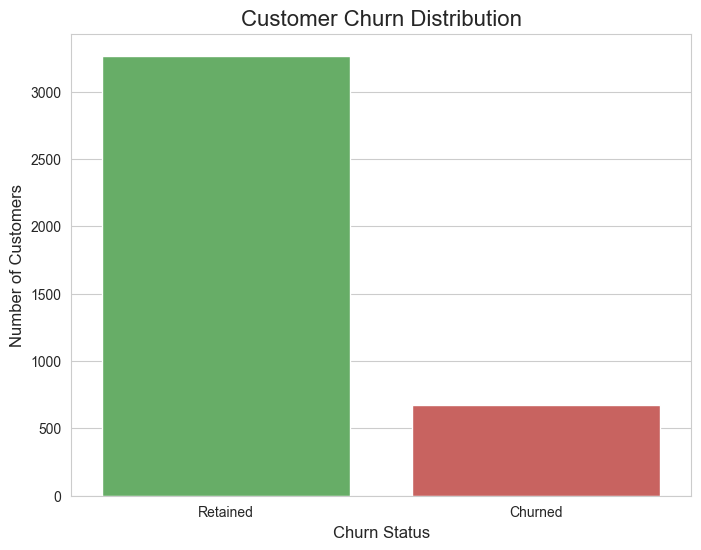

In [8]:
# Visualize the overall churn distribution
plt.figure(figsize=(8, 6))

# Corrected sns.countplot call
sns.countplot(x='Churn', data=df, palette=['#5cb85c', '#d9534f'], hue='Churn', legend=False)

plt.title('Customer Churn Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()

<h5> Numerical Feature Distributions </h5>

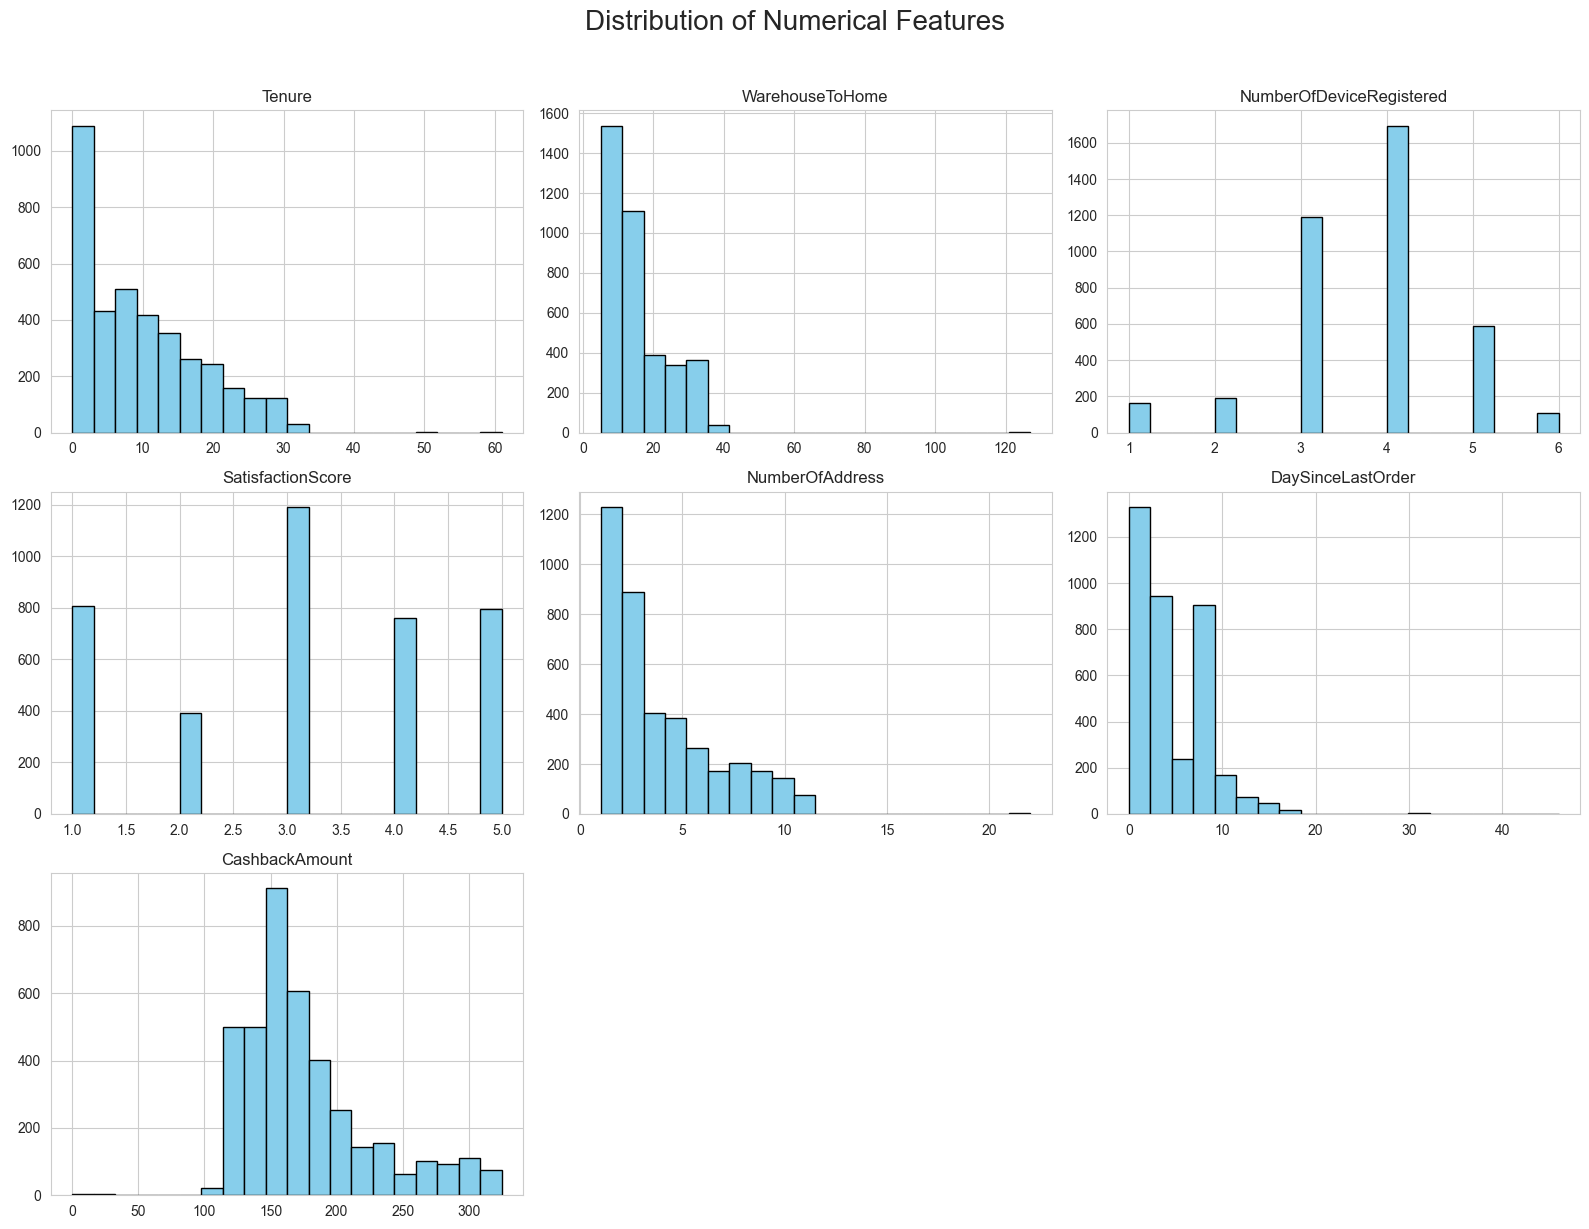

In [5]:
# Plot histograms for all numerical features to see their distributions
numerical_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                      'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

df[numerical_features].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


<h5> Categorical Feature Distributions </h5>

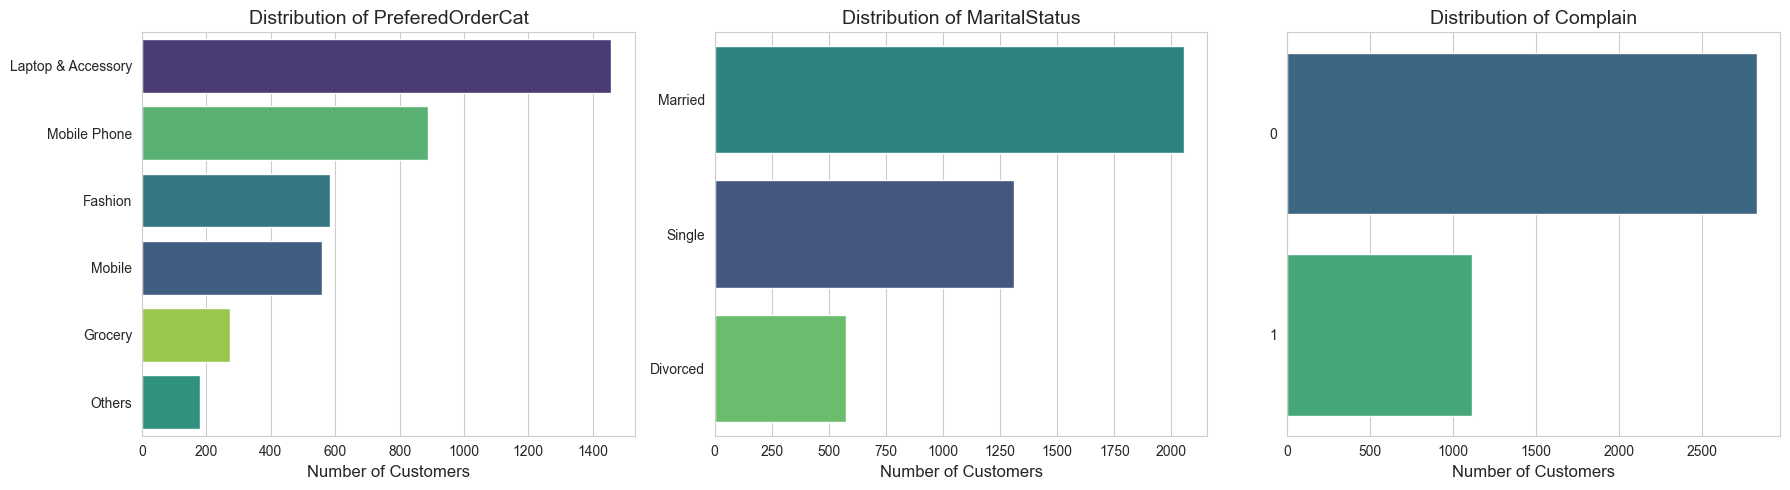

In [3]:

categorical_features = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    # The corrected way to create the count plot
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('')
    plt.xlabel('Number of Customers', fontsize=12)

plt.tight_layout()
plt.show()

<h5> Bivariate Analysis Categorical vs Churn </h5>

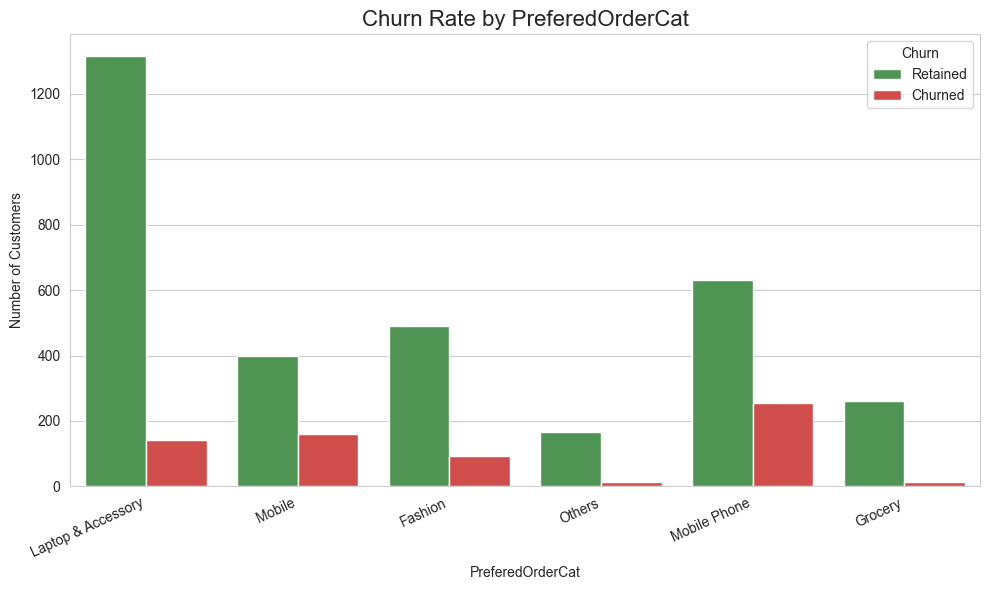

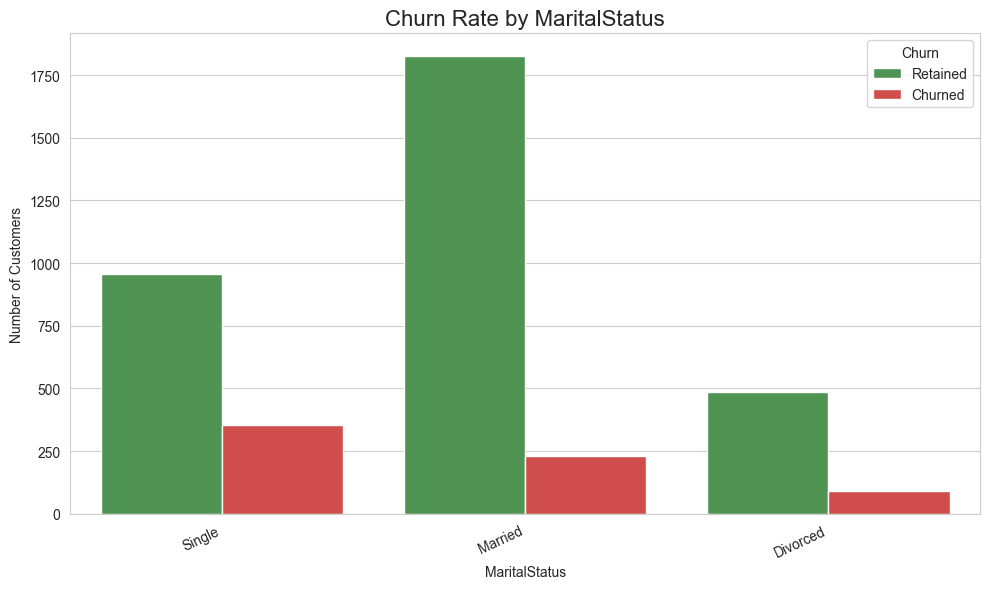

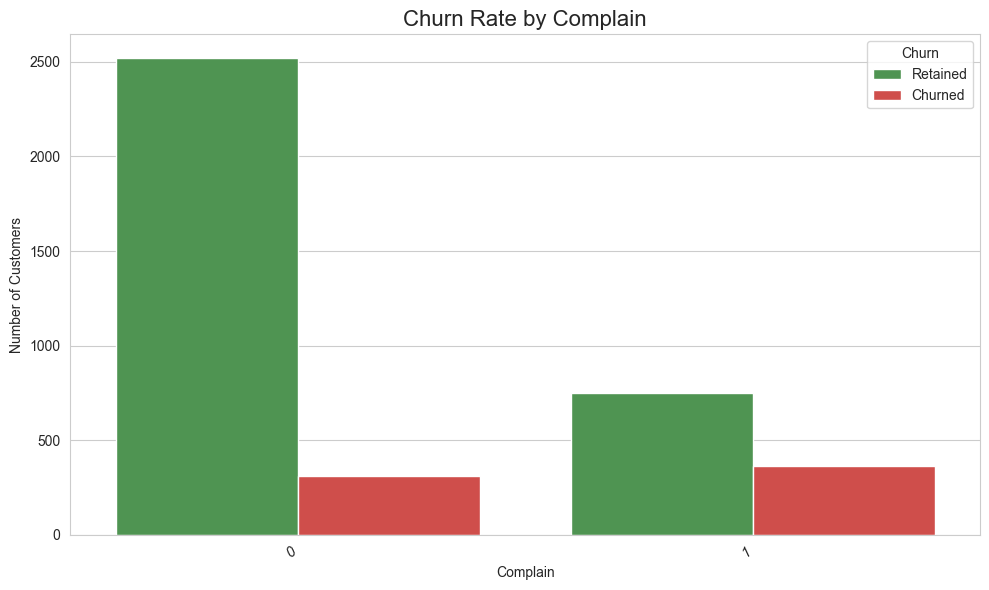

In [11]:
# Analyze the relationship between categorical features and churn
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette=['#43a047', '#e53935'])
    plt.title(f'Churn Rate by {col}', fontsize=16)
    plt.ylabel('Number of Customers')
    plt.xlabel(col)
    plt.xticks(rotation=25, ha='right')
    plt.legend(title='Churn', labels=['Retained', 'Churned'])
    plt.tight_layout()
    plt.show()


<h5> Bivariate Analysis Numerical vs Churn </h5>

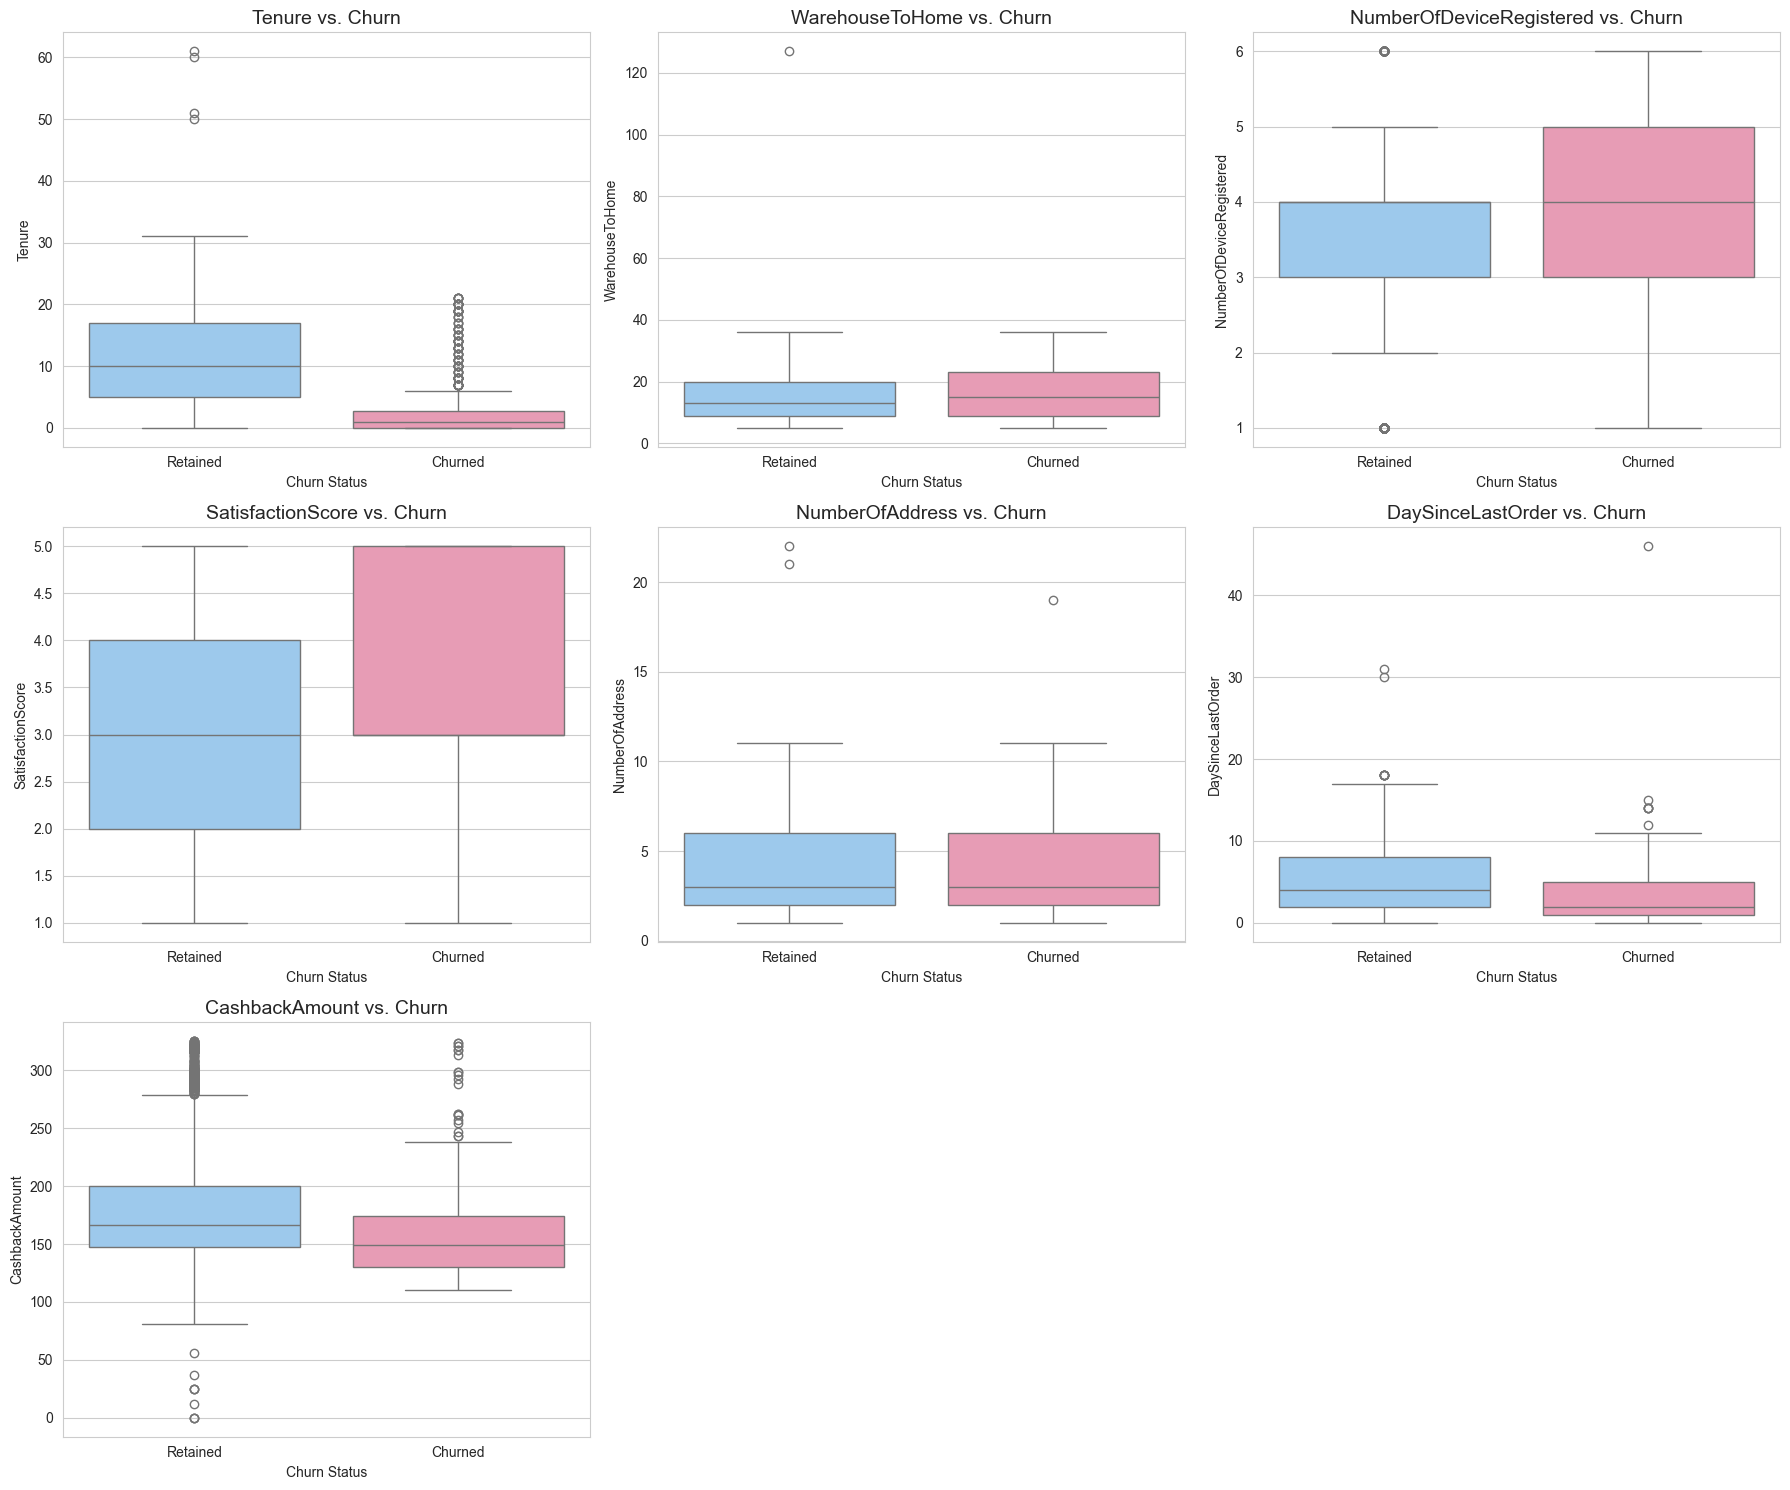

In [7]:
# Analyze the relationship between numerical features and churn using boxplots
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    # The corrected way to create the boxplot
    sns.boxplot(x='Churn', y=col, data=df, palette=['#90caf9', '#f48fb1'], hue='Churn', legend=False)
    plt.title(f'{col} vs. Churn', fontsize=14)
    plt.xlabel('Churn Status')
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.ylabel(col)
plt.tight_layout()
plt.show()


<h5> Correlation Heatmap </h5>

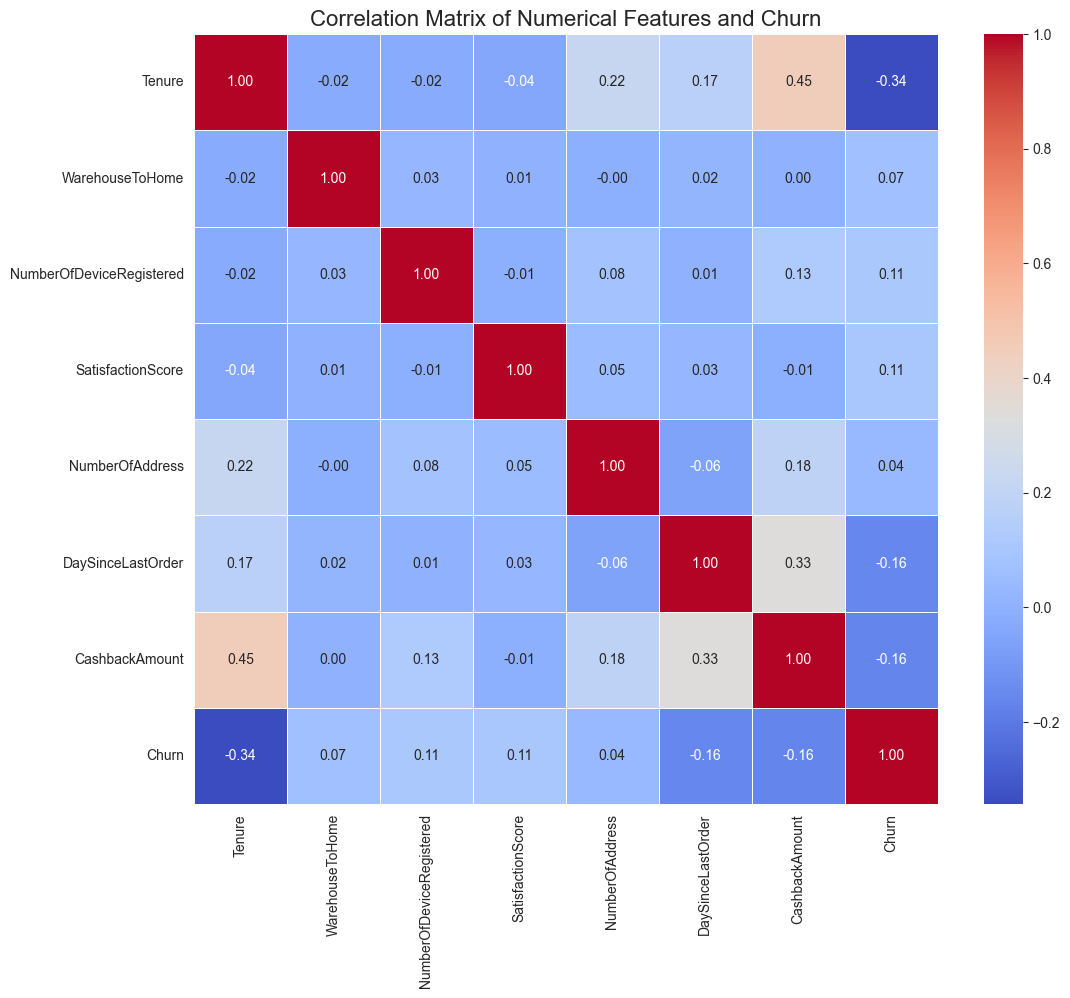

In [13]:
# Create a correlation matrix heatmap to see relationships between numerical features and churn
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Churn', fontsize=16)
plt.show()


<h3> Key Findings </h3>

<p>Tenure merepresentasikan customer akan churn apakah tidak<p>
<p>Complain menjadi representasi apakah customer akan churn dan berdampak sangat tinggi</p>
<p>Satisfaction berepengaruh terhadap churn ( low satisfaction --> probability churn )</p>
<p>Marital Status: Single lebih cenderung akan churn</p>
<p>Customer yang menggunakan mobile application untuk bertransaksi cenderung akan lebih churn</p>


